<h1>Ford GoBike System Data Exploration</h1>

<h1>I. Preliminary Wrangling</h1>


In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#import data
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
#Convert start time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [6]:
#add start month num and start num char to the dataframe
df['user_type']= df['user_type'].astype('category')
df['start_station_name']= df['start_station_name'].astype('category')
df['end_station_name']= df['end_station_name'].astype('category')

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

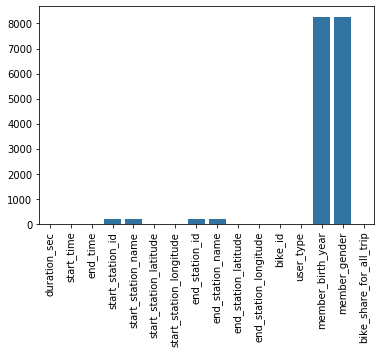

In [7]:
#check for null values
nan_counts = df.isna().sum()
base_color = sns.color_palette()[0]
sns.barplot(x= nan_counts.index.values, y= nan_counts, color = base_color)
plt.xticks(rotation=90);
nan_counts

In [8]:
#drop null vaues
df = df.dropna()

In [9]:
#let`s check for duplicates
df.duplicated().sum()

0

In [10]:
# we will extract month, dayofweek, hour from the start_time
df['start_month']= df.start_time.dt.strftime('%b')
df['start_day_week']= df.start_time.dt.strftime('%a')
df['start_hour']= df.start_time.dt.strftime('%H')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day_week,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Feb,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Feb,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Feb,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Feb,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Feb,Thu,23


In [11]:
# we will extract month, dayofweek, hour from the end_time
df['end_month']= df.end_time.dt.strftime('%b')
df['end_day_week']= df.end_time.dt.strftime('%a')
df['end_hour']= df.end_time.dt.strftime('%H')

In [12]:
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day_week,start_hour,end_month,end_day_week,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Feb,Thu,17,Mar,Fri,08
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Feb,Thu,12,Mar,Fri,05
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Feb,Thu,17,Mar,Fri,04
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,Feb,Thu,23,Mar,Fri,00
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,Feb,Thu,23,Mar,Fri,00


In [13]:
#add age column
max_year = df.end_time.dt.year.max()
df['age'] = df['member_birth_year'].apply(lambda x:  int(max_year - x))


In [14]:
#function to name plots
def xyt(x, y , t):
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel(y);

<h1>The structure of the dataset</h1>


GoBike Data is a dataset for bike trips happened on 2019, Each trip is anonymized and includes:-

{ Trip Duration (seconds), Start Time and Date, End Time and Date, Start Station ID, Start Station Name, Start Station Latitude Start Station Longitude, End Station ID, End Station Name, End Station Latitude, End Station Longitude, Bike ID and User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) }.



<h1>Main features of intrest<h1>

My main features of intrest are age, gender, user type and duration of trips

<h1>Features that will help support my investigation</h1>

It would be interesting to see what is the typical trip duration, how many people use the service on a given day, what is the gender of the people, do subscribers/customers use our service more?



<h2>I. Univariate Exploration</h2>

What is the most common Trip Durations?

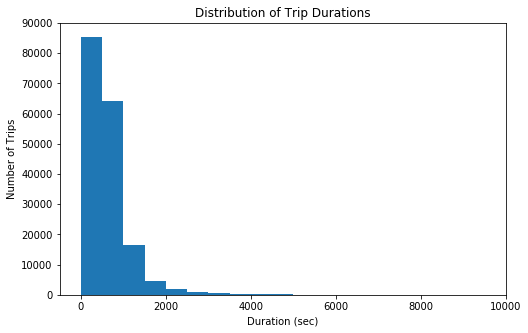

In [15]:
#ploting number of trips per trip duration 
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
xyt('Duration (sec)', 'Number of Trips', 'Distribution of Trip Durations')
plt.axis([-500, 10000, 0, 90000])
plt.show()

We can see that the most common duration time is from 0 to 500 secounds

What is the most common start station?


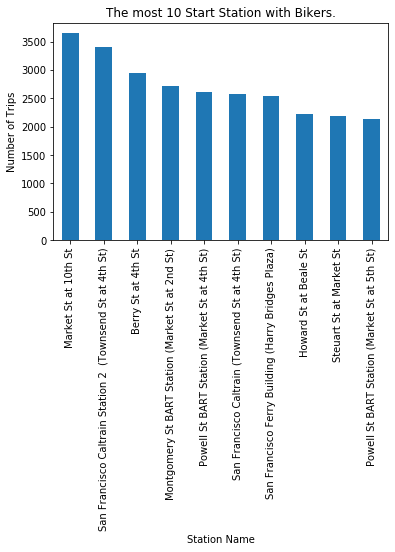

In [16]:
#ploting the most common start station 
df.start_station_name.value_counts(sort=True, ascending=False)[:10].plot(kind='bar');
xyt("Station Name", "Number of Trips", "The most 10 Start Station with Bikers.")


We can see that Market St at 10th St is the most common start station


What is the most common user type?

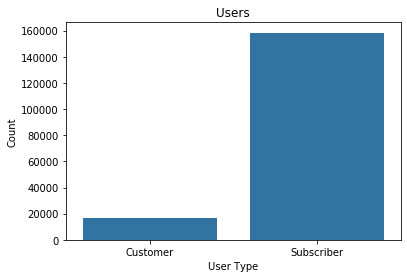

In [17]:
base_color= sns.color_palette()[0]
sns.countplot(data=df, x='user_type',color=base_color);
xyt("User Type", "Count", "Users")

We can see that the number of subscribers is more than Customers

What is the most common age?


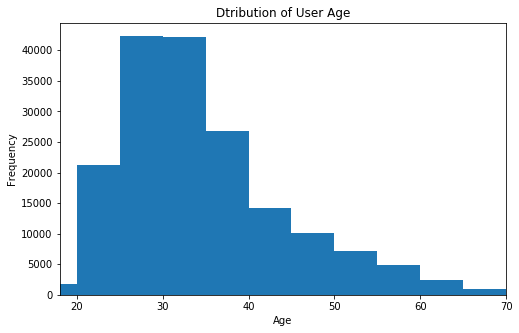

In [18]:
#ploting number of users in a specified age range
plt.figure(figsize = [8, 5])

binsize = 5
bins = np.arange(0, df['age'].max()+binsize, binsize)

plt.hist(data = df, x = 'age', bins = bins)
plt.xlim(18, 70)
xyt("Age", "Frequency", "Dtribution of User Age")
plt.show()

The distribution is right-skewed with the peak at between 30 to 35 and as age gets higher, user count decreases.



What is the gender of most users?

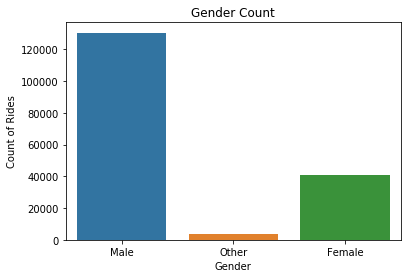

In [19]:
#histogram for number of rides for each gender
sns.countplot(data = df, x = 'member_gender')
xyt("Gender", "Count of Rides", "Gender Count")


Right away, we can see that the majority of users are males.


What is the month with the most rides?

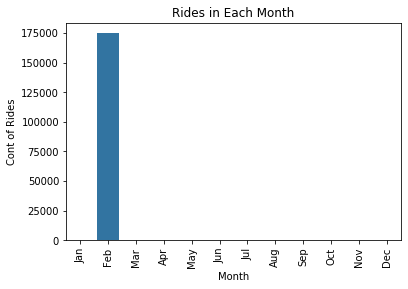

In [20]:
base_color = sns.color_palette()[0]

category_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
                 'Sep', 'Oct', 'Nov', 'Dec']

sns.countplot(data = df, x = 'start_month', order = category_order, color = base_color)
xyt("Month", "Cont of Rides", 'Rides in Each Month')
plt.xticks(rotation = 90);

We can see that all of the rides were made in February.

<h3>Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
</h3>

Most of the rides were made in ferbuary but I think it is because the data we have was only colected for 1 month. Additionally, I also saw that majority of the users are in the their 20's and 30's. I also noticed that most people who use the service are male subscribers and that the service is used more on weekdays than on weekends.



<h3>Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
</h3>

From the orignal dataframe the variables 'start_time' and 'end_time' where used to extract day and time value.  Also, the 'user_type' and 'member_gender' variables are converted to categorical datatype. Additionally, I had to determine the age of the users and then put them in uniform bins to get age group to see which age group uses the service the most.



<h2>II. Bivariate Exploration</h2>

What is the age of users with the longest rides?

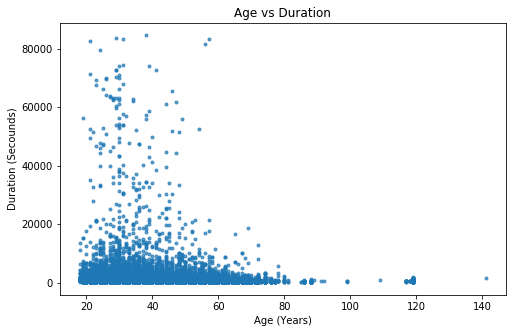

In [21]:
#ploting duaration vs age
plt.figure(figsize = [8, 5])
plt.scatter(x = df["age"], y = df["duration_sec"], marker = '.', alpha = 0.7)
xyt("Age (Years)", "Duration (Secounds)", "Age vs Duration")
plt.show()

As most of the durations are below 6000 and age is below 80, lets crop the plot till those values.

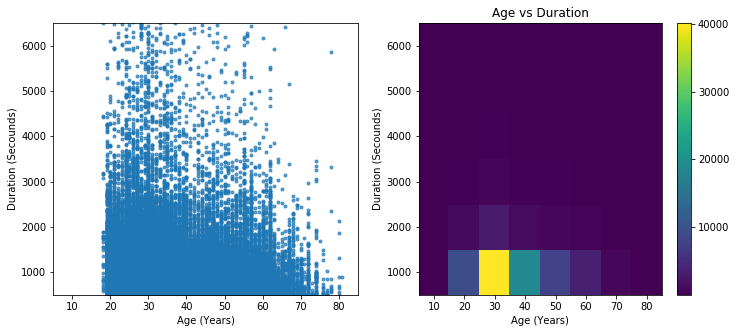

In [22]:
#zooming in the plot of duration vs age
plt.figure(figsize = [12, 5])
plt.subplot(1, 2, 1)
plt.scatter(x = df["age"], y = df["duration_sec"], marker = '.', alpha = 0.7)
plt.axis([5, 85, 500, 6500])
plt.xlabel("Age (Years)")
plt.ylabel("Duration (Secounds)")

#making heatmap of duration vs age
plt.subplot(1, 2, 2)
bins_x = np.arange(5, 85+1, 10)
bins_y = np.arange(500, 6500+1, 1000)

plt.hist2d(df['age'], df['duration_sec'], bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
xyt("Age (Years)", "Duration (Secounds)", "Age vs Duration")

plt.show()

folks in their early 30's comprise the bulk of the rides.

What gender do the longest rides?

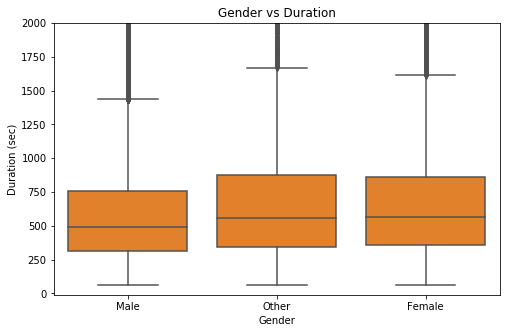

In [23]:
#boxplot for gender vs duration
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
xyt("Gender", "Duration (sec)", "Gender vs Duration")
plt.show()

The average duration of other genders and females is height than males

What is the the relationship between duarion and user type?

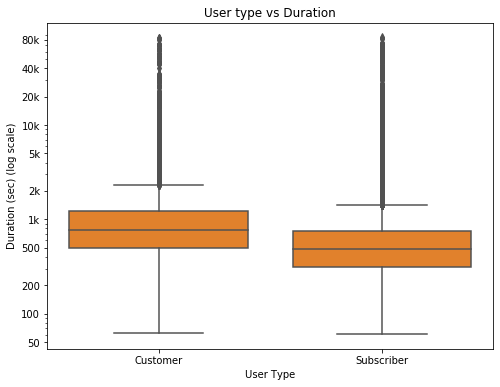

In [24]:
#boxplot for User type vs Duration
plt.figure(figsize=[8,6])
sns.boxplot(data=df, x='user_type', y='duration_sec', color=base_color)
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);
xyt("User Type", "Duration (sec) (log scale)", "User type vs Duration")


We can see that although the number of customers is fewer than subscribers their average time is heigher

What is the weekday usage of the bikeshare system per user type?

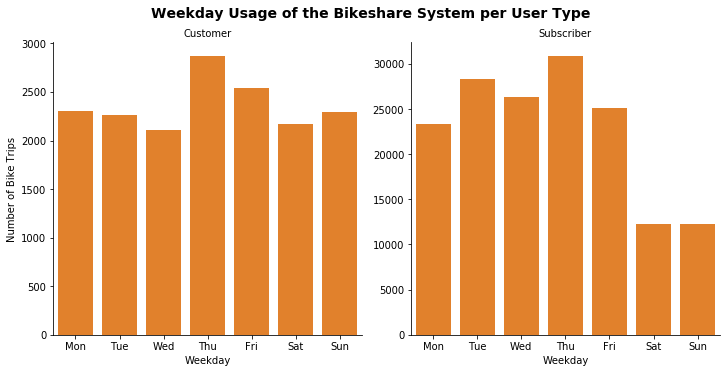

In [25]:
#making a histogram for each user type for the number of trips per day
cat_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df, x='start_day_week', col="user_type", kind='count', sharey = False, order = cat_order, color = base_color)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday Usage of the Bikeshare System per User Type', y=1.03, fontsize=14, fontweight='semibold');

Subscribers predominately use the ride service on Monday through Friday, while customers ride the most on the weekends.

<h3>Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
</h3>

I learned that the average duration of other genders and females is height than males. On average customers take longer trips than subscribers. Subscribers predominately use the ride service on Monday through Friday, while customers ride the most on the weekends.



<h3>Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
</h3>

No, I didn't notice any relationships between other features

<h2>III. Multivariate Exploration
</h2>

What is the user type Duration for each Day?

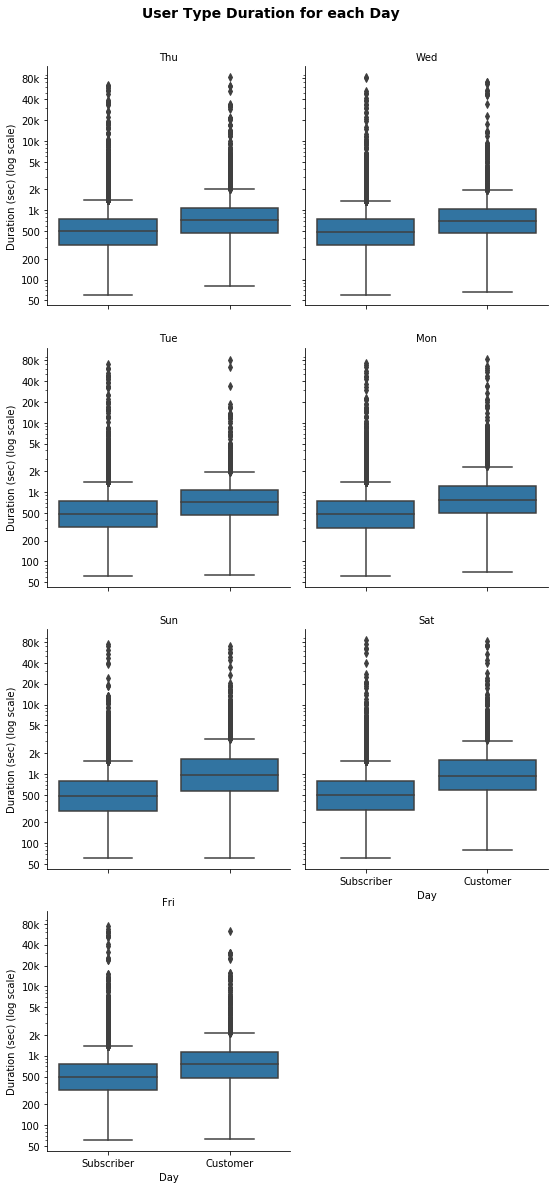

In [26]:
#making a box plot for each day for user type ride duration
g = sns.FacetGrid(data = df, col = 'start_day_week',col_wrap=2, height = 4)
g.map(sns.boxplot, 'user_type', 'duration_sec',order=df.user_type.value_counts().index)
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);
g.set_axis_labels("Day", "Duration (sec) (log scale)")
g.set_titles("{col_name}")
g.fig.suptitle('User Type Duration for each Day', y=1.03, fontsize=14, fontweight='semibold');

during all days of week the median (duration) of customer type is higher than the median (duration) of subscriber type


What Gender do the longest rides?

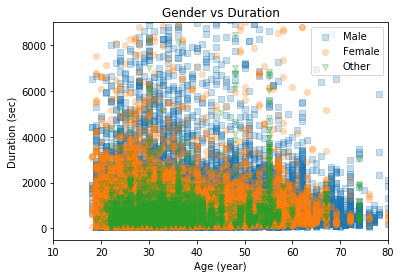

In [27]:
#ploting trip duration for each gender age
gender_markers = [['Male', 's'],['Female', 'o'],['Other', 'v']]

for gender, marker in gender_markers:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter((2019 - df_gender['member_birth_year']), df_gender['duration_sec'], marker = marker, alpha=0.25)
    
plt.legend(['Male','Female','Other'])
plt.axis([10, 80, -500, 9000 ])
xyt('Age (year)', 'Duration (sec)', "Gender vs Duration")
plt.show()

This plot does not show quit a clear picture, lets seperate all three genders into different graphs.



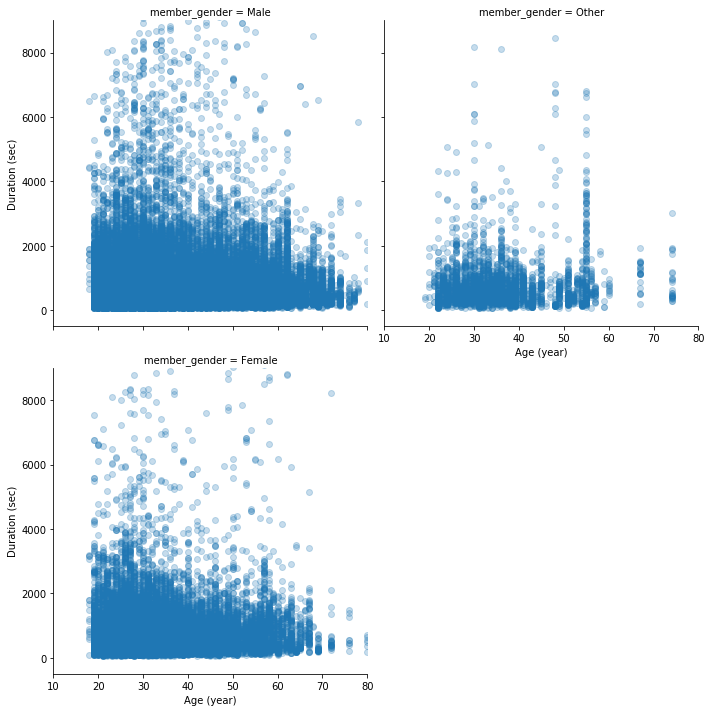

In [28]:
#making a plot for each gender alone for age vs duration
genders = sns.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, height = 5, xlim = [10, 80], ylim = [-500, 9000])
genders.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration (sec)')

plt.show()

Here we are seeing a jump in duration for others at an older age (around 60 years).


Trip Duration Across Gender and Age Group

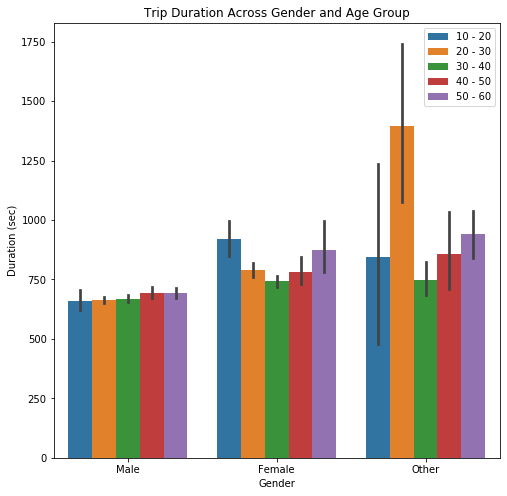

In [29]:
# create bar plot on gender versus duration on levels of the age bins variable
rides_age = df[df['age']<=60]
rides_age['member_age_bins'] = rides_age['age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

plt.figure(figsize = [8, 8])

ax = sns.barplot(x='member_gender', y = 'duration_sec', hue='member_age_bins', data=rides_age.sort_values(by= 'member_age_bins'))
xyt('Gender', 'Duration (sec)', 'Trip Duration Across Gender and Age Group')
leg = ax.legend()

In most gender types, the age range of 10-30 has the longest trip duration, except for males which all age groups are nearly the same.

<h3>Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
</h3>

In multivariate exploration I noticed that In all gender types, the age range of 10-20 has the longest trip duration, this is maybe due to the young age still has more stamina, so they tend to ride the bikes longer either for recreation or for school. All genders typically use the service for the same duration throughout the week ,althought we are seeing a jump in duration for others at an older age (around 60 years).



<h3>Were there any interesting or surprising interactions between features?
</h3>

during all days of week the median (duration) of customer type is higher than the median (duration) of subscriber type

